# Preprocessing Workflow


🎯 This exercise will take you through the preprocessing workflow. Step by step, feature by feature, you will investigate the dataset and take preprocessing decisions accordingly.

👇 Download the `ML_Houses_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv) and save it in the `data` folder as `ML_Houses_dataset.csv`. Then, run the code below to load the dataset and features you will be working with.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv")

data = data[['GrLivArea','BedroomAbvGr','KitchenAbvGr', 'OverallCond','RoofSurface','GarageFinish','CentralAir','ChimneyStyle','MoSold','SalePrice']].copy()

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,ChimneyStyle,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,bricks,2,208500
1,1262,3,1,8,874.0,RFn,Y,bricks,5,181500
2,1786,3,1,5,1593.0,RFn,Y,castiron,9,223500
3,1717,3,1,5,2566.0,Unf,Y,castiron,2,140000
4,2198,4,1,5,3130.0,RFn,Y,bricks,12,250000


👉 Take the time to do a preliminary investigation of the features by reading the dataset description available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt). Make sure to use refer to it throughout the day.

# Duplicates

ℹ️ Duplicates in datasets can cause data leakage. It is important to locate and remove any meaningless duplicates.

❓ How many duplicated rows are there in the dataset? Save your answer under variable name `duplicate_count`.

In [2]:
# YOUR CODE HERE
duplicate_count = data.duplicated().sum()
duplicate_count

300

👇 Remove the duplicates from the dataset. Overwite the dataframe `data`.

In [3]:
# YOUR CODE HERE
data = data.drop_duplicates()
len(data)

1460

### ☑️ Test your code

In [4]:
from nbresult import ChallengeResult

result = ChallengeResult('duplicates',
                         duplicates = duplicate_count,
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_duplicates.py::TestDuplicates::test_dataset_length PASSED     [ 50%]
tests/test_duplicates.py::TestDuplicates::test_duplicate_count PASSED    [100%]

============================== 2 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/duplicates.pickle

git commit -m 'Completed duplicates step'

git push origin master


# Missing data

👇 Print out the percentage of missing values for all columns of the dataframe.

In [5]:
# YOUR CODE HERE
(data.isnull().sum()/len(data))*100

GrLivArea       0.000000
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
OverallCond     0.000000
RoofSurface     0.616438
GarageFinish    5.547945
CentralAir      0.000000
ChimneyStyle    0.000000
MoSold          0.000000
SalePrice       0.000000
dtype: float64

## `GarageFinish`

👇 Investigate the missing values in `GarageFinish`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ According to the dataset description, the missing values in `GarageFinish` represent a house having no garage. They need to be encoded as such.
</details>

In [6]:
(data.GarageFinish.isnull().sum()/len(data))*100 #percentage of missing values in Garage Finish

5.5479452054794525

In [7]:
#replace
data.GarageFinish.replace(np.nan, "NoGarageFinish", inplace=True) #Replace NaN by "NoGarageFinish"
data.GarageFinish.value_counts()

Unf               605
RFn               422
Fin               352
NoGarageFinish     81
Name: GarageFinish, dtype: int64

## `RoofSurface`

👇 Investigate the missing values in `RoofSurface`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median using Sklearn's `SimpleImputer`
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `RoofSurface` has a few missing values that can be imputed by the median value.
</details>

In [8]:
(data.RoofSurface.isnull().sum()/len(data))*100

0.6164383561643836

In [31]:
# YOUR CODE HERE
#strategy mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(data[['RoofSurface']])

data['RoofSurface'] = imputer.transform(data[['RoofSurface']])
imputer.statistics_

array([0.51752259])

👇 When you are done, print out the percentage of missing values for the entire dataframe.

In [10]:
# YOUR CODE HERE
missing_values = (data.RoofSurface.isnull().sum()/len(data))*100
missing_values

0.0

⚠️ Be careful: not all missing values are represented `np.nans`, and python's `isnull()` only detects `np.nans` ⚠️

## `ChimneyStyle`

👇 Investigate the missing values in `ChimneyStyle`. Then, chose one of the following solutions:

1. Drop the column entirely
2. Impute the column median
3. Preserve the NaNs and replace by actual meaning

Make changes effective in the dataframe `data`.


<details>
    <summary>💡 Hint</summary>
ℹ️ `ChimneyStyle` has a lot of missing values. The description does not touch on what they represent. As such, it is better not to make any assumptions and to drop the column entirely.
</details>

In [11]:
#data.isnull().sum().sort_values(ascending=False) 
data.drop(columns=['ChimneyStyle'], inplace=True)
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,1710,3,1,5,1995.0,RFn,Y,2,208500
1,1262,3,1,8,874.0,RFn,Y,5,181500
2,1786,3,1,5,1593.0,RFn,Y,9,223500
3,1717,3,1,5,2566.0,Unf,Y,2,140000
4,2198,4,1,5,3130.0,RFn,Y,12,250000


### ☑️ Test your code

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_nans PASSED       [ 50%]
tests/test_missing_values.py::TestMissing_values::test_number_of_columns PASSED [100%]

============================== 2 passed in 0.44s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


# Scaling

##  `RoofSurface` 

👇 Investigate `RoofSurface` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

<AxesSubplot:>

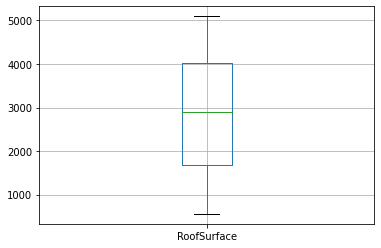

In [13]:
# YOUR CODE HERE
data[['RoofSurface']].boxplot()

<details>
    <summary>💡 Hint</summary>
ℹ️ Since `RoofSurface` does not seem to have a normal distribution, it is better to MinMax scale.
</details>

(array([151., 150., 124., 124., 153., 166., 134., 156., 143., 159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

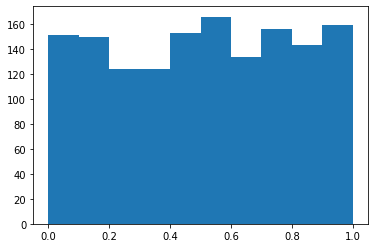

In [14]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
minmax_roof = MinMaxScaler()
minmax_roof.fit(data[['RoofSurface']]) # Fit scaler to data
data['RoofSurface'] = minmax_roof.transform(data[['RoofSurface']])
plt.hist(data['RoofSurface'])

## `GrLivArea`

👇 Investigate `GrLivArea` for distribution and outliers. Then, choose the most appropriate scaling technique. Either:

1. Standard Scale
2. Robust Scale
3. MinMax Scale

Replace the original columns by the transformed values.

In [15]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler() 
r_scaler.fit(data[['GrLivArea']]) 
data['GrLivArea'] = r_scaler.transform(data[['GrLivArea']]) 
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice
0,0.380070,3,1,5,0.316729,RFn,Y,2,208500
1,-0.312090,3,1,8,0.069650,RFn,Y,5,181500
2,0.497489,3,1,5,0.228124,RFn,Y,9,223500
3,0.390885,3,1,5,0.442583,Unf,Y,2,140000
4,1.134029,4,1,5,0.566894,RFn,Y,12,250000


<details>
    <summary>💡 Hint</summary>
ℹ️ `GrLivArea` has a normal distribution, and some outliers. It needs to be Robust scaled.
</details>

In [0]:
# YOUR CODE HERE

## `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr`

👇 Investigate `BedroomAbvGr`, `OverallCond` & `KitchenAbvGr`. Then, chose one of the following scaling techniques:

1. MinMax Scale
2. Standard Scale
3. Robust Scale

Replace the original columns by the transformed values.

<details>
    <summary>💡 Hint</summary>
ℹ️ `BedroomAbvGr` ,  `OverallCond` & `KitchenAbvGr` are ordinal features that can be MinMax scaled.
</details>

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.392e+03, 0.000e+00, 0.000e+00,
        6.500e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

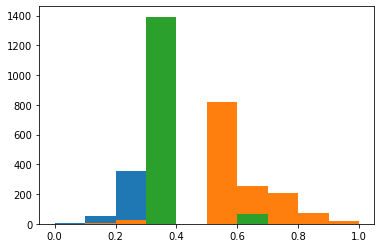

In [16]:
# YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
minmax_bed = MinMaxScaler()
minmax_bed.fit(data[['BedroomAbvGr']]) # Fit scaler to data
data['BedroomAbvGr'] = minmax_bed.transform(data[['BedroomAbvGr']])
plt.hist(data['BedroomAbvGr'])


minmax_over = MinMaxScaler()
minmax_over.fit(data[['OverallCond']]) # Fit scaler to data
data['OverallCond'] = minmax_over.transform(data[['OverallCond']])
plt.hist(data['OverallCond'])


minmax_kitchen = MinMaxScaler()
minmax_kitchen.fit(data[['KitchenAbvGr']]) # Fit scaler to data
data['KitchenAbvGr'] = minmax_kitchen.transform(data[['KitchenAbvGr']])
plt.hist(data['KitchenAbvGr'])

### ☑️ Test your code

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = data
)

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 3 items

tests/test_scaling.py::TestScaling::test_bedroom_kitchen_condition PASSED [ 33%]
tests/test_scaling.py::TestScaling::test_gr_liv_area PASSED              [ 66%]
tests/test_scaling.py::TestScaling::test_roof_surface PASSED             [100%]

============================== 3 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


# Feature Engineering

## `GarageFinish`

👇 Investigate `GarageFinish` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Add the encoding to the dataframe as new colum(s), and remove the original column.


In [18]:
data.GarageFinish

0       RFn
1       RFn
2       RFn
3       Unf
4       RFn
       ... 
1455    RFn
1456    Unf
1457    RFn
1458    Unf
1459    Fin
Name: GarageFinish, Length: 1460, dtype: object

<details>
    <summary>💡 Hint</summary>
ℹ️ `GarageFinish` is a multicategorical feature that must be One hot encoded.
</details>

In [19]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
import numpy as np
data.GarageFinish.unique()  
ohe = OneHotEncoder(sparse = False) 
ohe.fit(data[['GarageFinish']]) 
garage_encoded = ohe.transform(data[['GarageFinish']]) 


In [20]:
ohe.categories_

[array(['Fin', 'NoGarageFinish', 'RFn', 'Unf'], dtype=object)]

In [21]:
data["Fin"],data["NoGarageFinish"],data["RFn"], data["Unf"] = garage_encoded.T # Transpose encoded Alley back into dataframe
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,MoSold,SalePrice,Fin,NoGarageFinish,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,RFn,Y,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,RFn,Y,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,RFn,Y,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,Unf,Y,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,RFn,Y,12,250000,0.0,0.0,1.0,0.0


In [22]:
data.drop(columns='GarageFinish', inplace=True)

## Encoding  `CentralAir`

👇 Investigate `CentralAir` and chose one of the following encoding techniques accordingly:
- Ordinal encoding
- One-Hot encoding

Replace the original column by the encoding.


<details>
    <summary>💡 Hint</summary>
ℹ️ `CentralAir` is a binary categorical feature.
</details>

In [23]:
# YOUR CODE HERE
data.CentralAir.unique() 
from sklearn.preprocessing import OneHotEncoder

data.CentralAir.unique() # Check unique values for streets (2)
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciate encoder for binary feature
ohe.fit(data[['CentralAir']]) # Fit encoder
data['CentralAir'] = ohe.transform(data[['CentralAir']]) # Encode Street
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,MoSold,SalePrice,Fin,NoGarageFinish,RFn,Unf
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,2,208500,0.0,0.0,1.0,0.0
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,5,181500,0.0,0.0,1.0,0.0
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,9,223500,0.0,0.0,1.0,0.0
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,2,140000,0.0,0.0,0.0,1.0
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,12,250000,0.0,0.0,1.0,0.0


## `MoSold` - Cyclical engineering 

Data can be continuous, discrete, categorical, ordinal, but it can also be cyclical. Temporal data is a prime example of that: months, days, minutes. Such data needs specific preprocessing for Machine Learning models to understand and consider its cyclical nature.

Consider the feature `MoSold`, the month on which the house was sold. If left as is, a model would not understand that after 12 (December) comes 1 (January). It would only consider the values on a linear scale.

👇 Do your own investigation on how to preprocess cyclical features in Machine Learning. Then, transform `MoSold` according to your findings.

⚠️ Replace the original column by the new features.

<details>
    <summary>💡 Hint</summary>
ℹ️ This <a href='https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time' target='blank'>article</a> explains how to deal with cyclical features.
    
</details>

**❓ How would you name these 2 new features?**

Let's add two new columns to your data frame, `sin_MoSold` and `cos_MoSold`, containing the sine and cosine of the `MoSold` column respectively.  Once these columns are added we can drop the original `MoSold` column.

In [24]:
# YOUR CODE HERE
import numpy as np 
month_of_year = 12

data['sin_MoSold'] = np.sin(2*np.pi*data.MoSold/12)
data['cos_MoSold'] = np.cos(2*np.pi*data.MoSold/12)

data.drop(columns='MoSold', inplace=True)

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,GarageFinish,CentralAir,SalePrice,feature1,feature2,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,0.0,1.0,208500,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,0.0,1.0,181500,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,0.0,1.0,223500,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,0.0,1.0,140000,1.0,0.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,0.0,1.0,250000,1.0,0.0,-2.449294e-16,1.000000e+00


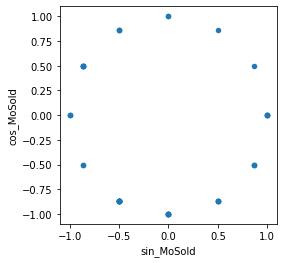

In [95]:
data.sample(50).plot.scatter('sin_MoSold','cos_MoSold').set_aspect('equal');
data.head()

In [25]:
data.head()


,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarageFinish,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


### ☑️ Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding', dataset = data, new_features = ['sin_MoSold', 'cos_MoSold'])

result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/selmalopez/.pyenv/versions/lewagon_current/bin/python3
cachedir: .pytest_cache
rootdir: /Users/selmalopez/code/selmalopez/data-challenges/05-ML/02-Prepare-the-dataset/01-Preprocessing-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_central_air PASSED            [ 25%]
tests/test_encoding.py::TestEncoding::test_columns PASSED                [ 50%]
tests/test_encoding.py::TestEncoding::test_month_sold_features PASSED    [ 75%]
tests/test_encoding.py::TestEncoding::test_month_sold_features_number PASSED [100%]

============================== 4 passed in 0.44s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


# Export the dataset

👇 Now that the dataset has been preprocessed, execute the code below to export it. You will keep working on it in the next exercise.

In [29]:
data.to_csv("../02-Feature-Selection/data/clean_dataset.csv", index=False)

# 🏁